In [135]:
#크롤링시 필요한 라이브러리 불러오기

from bs4 import BeautifulSoup
import requests
import ssl

# 페이지 url 형식에 맞게 바꾸어 주는 함수 만들기
  #입력된 수를 1, 11, 21, 31 ...만들어 주는 함수
def makePgNum(num):
    if num == 1:
        return num
    elif num == 0:
        return num+1
    else:
        return num+9*(num-1)

# 크롤링할 url 생성하는 함수 만들기(검색어, 크롤링 시작 페이지, 크롤링 종료 페이지)
def makeUrl(search,start_pg,end_pg):
    if start_pg == end_pg:
        start_page = makePgNum(start_pg)
        url = "https://search.naver.com/search.naver?where=news&sm=tab_pge&query=" + search + "&start=" + str(start_page)
        print("생성url: ",url)
        return url
    else:
        urls= []
        for i in range(start_pg,end_pg+1):
            page = makePgNum(i)
            url = "https://search.naver.com/search.naver?where=news&sm=tab_pge&query=" + search + "&start=" + str(page)
            urls.append(url)
        print("생성url: ",urls)
        return urls

# html에서 원하는 속성 추출하는 함수 만들기 (기사, 추출하려는 속성값)
def news_attrs_crawler(articles,attrs):
    attrs_content=[]
    str1 = "따릉이"
    for i in articles:
        if str1 in i.attrs[attrs]:
            attrs_content.append(i.attrs[attrs])
    return attrs_content

#html생성해서 기사크롤링하는 함수 만들기(제목)
def articles_crawler(url):
    #html 불러오기
    original_html = requests.get(i, headers={'User-Agent':'Mozilla/5.0'}, verify=False)
    html = BeautifulSoup(original_html.text, "html.parser")
    # 검색결과
    articles = html.select("div.group_news > ul.list_news > li div.news_area > a")
    title = news_attrs_crawler(articles,'title')
    return title

#####뉴스크롤링 시작#####

#검색어
search = "따릉이 만족도"

#검색 시작할 페이지 입력
page = 1
print("\n크롤링할 시작 페이지: ",page,"페이지")   
#검색 종료할 페이지 입력
page2 = 55
print("\n크롤링할 종료 페이지: ",page2,"페이지")   

# naver url 생성
url = makeUrl(search,page,page2)

#뉴스 크롤러 실행
news_titles = []
str1 = "따릉이"
for i in url:
    title = articles_crawler(url)
    news_titles.append(title)

print("\n[뉴스 제목]")

###데이터 프레임으로 만들기###
import pandas as pd

#제목을 1차원 리스트로 꺼내는 함수 생성
def makeList(newlist, content):
    for i in content:
        for j in i:
            newlist.append(j)
    return newlist
    
#제목, 링크, 내용 담을 리스트 생성
news_titles_1 = []

#1차원 리스트로 만들기(내용 제외)
makeList(news_titles_1,news_titles)


#데이터 프레임 만들기
news_df = pd.DataFrame({'title':news_titles_1})
news_df.to_csv('./따릉이 데이터/따릉이 만족도 검색결과.csv', encoding='utf8') 



크롤링할 시작 페이지:  1 페이지

크롤링할 종료 페이지:  55 페이지
생성url:  ['https://search.naver.com/search.naver?where=news&sm=tab_pge&query=따릉이 만족도&start=1', 'https://search.naver.com/search.naver?where=news&sm=tab_pge&query=따릉이 만족도&start=11', 'https://search.naver.com/search.naver?where=news&sm=tab_pge&query=따릉이 만족도&start=21', 'https://search.naver.com/search.naver?where=news&sm=tab_pge&query=따릉이 만족도&start=31', 'https://search.naver.com/search.naver?where=news&sm=tab_pge&query=따릉이 만족도&start=41', 'https://search.naver.com/search.naver?where=news&sm=tab_pge&query=따릉이 만족도&start=51', 'https://search.naver.com/search.naver?where=news&sm=tab_pge&query=따릉이 만족도&start=61', 'https://search.naver.com/search.naver?where=news&sm=tab_pge&query=따릉이 만족도&start=71', 'https://search.naver.com/search.naver?where=news&sm=tab_pge&query=따릉이 만족도&start=81', 'https://search.naver.com/search.naver?where=news&sm=tab_pge&query=따릉이 만족도&start=91', 'https://search.naver.com/search.naver?where=news&sm=tab_pge&query=따릉이 만족도&start=101', 'h

In [3]:
import pandas as pd
pd.__version__

'1.5.2'

In [4]:
import os
os.environ["PYTHONIOENCODING"] = "utf-8"

In [5]:
import warnings
warnings.filterwarnings(action='ignore')

In [6]:
nsmc_train_df = pd.read_csv('./따릉이 데이터/ratings_train.txt', encoding='utf8', sep='\t', engine='python')
nsmc_train_df.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [7]:
nsmc_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        150000 non-null  int64 
 1   document  149995 non-null  object
 2   label     150000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.4+ MB


In [8]:
nsmc_train_df = nsmc_train_df[nsmc_train_df['document'].notnull()]

In [9]:
nsmc_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149995 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        149995 non-null  int64 
 1   document  149995 non-null  object
 2   label     149995 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.6+ MB


In [10]:
nsmc_train_df['label'].value_counts()

0    75170
1    74825
Name: label, dtype: int64

In [11]:
import re

In [12]:
nsmc_train_df['document'] = nsmc_train_df['document'].apply(lambda x : re.sub(r'[^ ㄱ-ㅣ가-힣]+', " ", x))
nsmc_train_df.head()

,id,document,label
0,9976970,아 더빙 진짜 짜증나네요 목소리,0
1,3819312,흠 포스터보고 초딩영화줄 오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 솔직히 재미는 없다 평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화 스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [13]:
nsmc_test_df = pd.read_csv('./따릉이 데이터/ratings_test.txt', encoding='utf8', sep='\t', engine='python')
nsmc_test_df.head()

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0


In [14]:
nsmc_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        50000 non-null  int64 
 1   document  49997 non-null  object
 2   label     50000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.1+ MB


In [15]:
nsmc_test_df = nsmc_test_df[nsmc_test_df['document'].notnull()]

In [16]:
print(nsmc_test_df['label'].value_counts())

1    25171
0    24826
Name: label, dtype: int64


In [17]:
nsmc_test_df['document'] = nsmc_test_df['document'].apply(lambda x : re.sub(r'[^ ㄱ-ㅣ가-힣]+', "", x))

In [18]:
!pip install konlpy

Defaulting to user installation because normal site-packages is not writeable


In [19]:
from konlpy.tag import Okt

okt = Okt()

In [20]:
def okt_tokenizer(text):
    tokens = okt.morphs(text)
    return tokens

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(tokenizer = okt_tokenizer, ngram_range=(1,2), min_df=3, max_df=0.9)
tfidf.fit(nsmc_train_df['document'])
nsmc_train_tfidf = tfidf.transform(nsmc_train_df['document'])

In [22]:
from sklearn.linear_model import LogisticRegression

SA_lr = LogisticRegression(random_state = 0)

In [23]:
SA_lr.fit(nsmc_train_tfidf, nsmc_train_df['label'])

LogisticRegression(random_state=0)

In [24]:
from sklearn.model_selection import GridSearchCV

params = {'C': [1, 3, 3.5, 4, 4.5, 5]}
SA_lr_grid_cv = GridSearchCV(SA_lr, param_grid=params, cv=3, scoring='accuracy', verbose=1)

In [25]:
SA_lr_grid_cv.fit(nsmc_train_tfidf, nsmc_train_df['label'])

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3, estimator=LogisticRegression(random_state=0),
             param_grid={'C': [1, 3, 3.5, 4, 4.5, 5]}, scoring='accuracy',
             verbose=1)

In [26]:
print(SA_lr_grid_cv.best_params_, round(SA_lr_grid_cv.best_score_, 4))

{'C': 3} 0.8553


In [27]:
# 최적 파라미터의 best 모델 저장
SA_lr_best = SA_lr_grid_cv.best_estimator_

In [28]:
# 평가용 데이터의 피처 벡터화 : 실행시간 6분 정도 걸립니다 ☺
nsmc_test_tfidf = tfidf.transform(nsmc_test_df['document'])

In [29]:
test_predict = SA_lr_best.predict(nsmc_test_tfidf)

In [30]:
from sklearn.metrics import accuracy_score

print('감성 분석 정확도 : ', round(accuracy_score(nsmc_test_df['label'], test_predict), 3))

감성 분석 정확도 :  0.857


In [154]:
st = input('감성 분석할 문장입력 >> ')

감성 분석할 문장입력 >> 서울시 공유정책 따릉이는 높은 만족도를 보여준다.


In [155]:
# 0) 입력 텍스트에 대한 전처리 수행
st = re.compile(r'[ㄱ-ㅣ가-힣]+').findall(st)
print(st)
st = [" ".join(st)]
print(st)

['서울시', '공유정책', '따릉이는', '높은', '만족도를', '보여준다']
['서울시 공유정책 따릉이는 높은 만족도를 보여준다']


In [156]:
# 1) 입력 텍스트의 피처 벡터화
st_tfidf = tfidf.transform(st)

# 2) 최적 감성분석 모델에 적용하여 감성 분석 평가
st_predict = SA_lr_best.predict(st_tfidf)

In [157]:
# 3) 예측 값 출력하기
if(st_predict== 0):
    print(st , "->> 부정 감성")
else :
    print(st , "->> 긍정 감성")

['서울시 공유정책 따릉이는 높은 만족도를 보여준다'] ->> 부정 감성


In [3]:
data = pd.read_csv('./따릉이 데이터/따릉이 만족도 검색결과.csv')

In [163]:
print(data.title)

0            시민 만족도 1위 따릉이, 대여소는 폐쇄 요청 봇물 왜?
1       회원 350만 만족도 97% 따릉이, 적자 비켜나세요 ‘따르릉~’
2          서울시, '따릉이' 광고사업 시범 운영… 만년 적자 해결할까
3          "2년 새 2배" 인기 폭발 따릉이...예산·정비는 그대로?
4              서울시민 공유활동 활발…만족도는'따릉이'가 가장 높아
                       ...                  
282    서울시민 2명 중 1명 "공유 서비스 이용해봤다"··· 따릉이 1위
283                서울시민이 뽑은 뉴스 1위는 자전거 '따릉이'
284    서울시민 2명 중 1명 "공유 서비스 이용해봤다"··· 따릉이 1위
285          서울 공공자전거‘따릉이’ 내달 15일부터 2000대 운영
286                서울시민이 뽑은 뉴스 1위는 자전거 '따릉이'
Name: title, Length: 287, dtype: object


In [164]:
data_title =[]
data_description = []

for item in data.title:
    data_title.append(item)

In [165]:
data_title

['시민 만족도 1위 따릉이, 대여소는 폐쇄 요청 봇물 왜?',
 '회원 350만 만족도 97% 따릉이, 적자 비켜나세요 ‘따르릉~’',
 "서울시, '따릉이' 광고사업 시범 운영… 만년 적자 해결할까",
 '"2년 새 2배" 인기 폭발 따릉이...예산·정비는 그대로?',
 "서울시민 공유활동 활발…만족도는'따릉이'가 가장 높아",
 '서울시 ‘따릉이’, 시민 3명 중 1명은 탄다… 누적 이용 1억 건 눈앞',
 "서울시 공유정책, 만족도 1위는 '따릉이'..재능공유 활성화 필요해",
 "서울시 공유정책 만족도 1위는 '따릉이'",
 '박원순도 오세훈도 ‘따릉이’엔 진심...서울 시민의 ‘발’ 된 따릉이',
 "325만명이 애용하는 '따릉이', 앱 성능 향상 나선다",
 '"우리도 타고싶어요" 6살 따릉이가 성공한 이유',
 '"부천시민도 타고 싶어요"...지구 5926바퀴 누빈 서울 따릉이',
 '[국감브리핑] 따릉이 100억 적자…기업광고 유치도 빨간불',
 '[데스크 시각] 더 힘차게 달려라 따릉이!/이창구 전국부장',
 '[국감 핫이슈] ‘100억 적자’ 따릉이…수익 낼 기업광고 유치도 ‘빨간불’',
 "'만족도 1위' 따릉이 직원들은 ○○에 분노한다",
 '따릉이를 탑니다, 국가의 역할을 생각합니다',
 '서울시-서울시설공단, 따릉이 광고 시범 도입',
 '결제 먹통에 로그인 오류…길에서 시간 날리는 따릉이 ‘앱’',
 "서울시 공유자전거 '따릉이' 만족도 90% 이상",
 '페달로·따릉이 비켜나세요···따릉따릉 잘나가는 카카오T바이크',
 '서울시민들 따릉이 사랑..."무한대로 늘려 주세요!"',
 '[정영재 曰] 따릉이가 바꾼 서울 풍경',
 'MZ세대, 고물가 극복은 한솥도시락과 따릉이로 한다',
 '서울시민 만족도 1위 공유정책은?…공공자전거 ‘따릉이’',
 "출범 1년 서울시 '따릉이' 만족도 대체로 높아",
 '‘저임금 노동’에 ‘100억 적자’ 따릉이…“나 계속 달릴 수 있죠?”',
 '지난해만 ‘100억 적자’ 따릉이…계속 달릴 수 있을

In [166]:
data_df = pd.DataFrame({'title':data_title})

In [167]:
# 1) 분석할 데이터의 피처 벡터화 ---<< title >> 분석
data_title_tfidf = tfidf.transform(data_df['title'])

# 2) 최적 파라미터 학습모델에 적용하여 감성 분석
data_title_predict = SA_lr_best.predict(data_title_tfidf)

# 3) 감성 분석 결과값을 데이터 프레임에 저장
data_df['title_label'] = data_title_predict

In [170]:
# csv 파일로 저장 ---------------------------------------------
data_df.to_csv('./따릉이 데이터/따릉이 만족도 감성분석.csv', encoding='utf8') 

In [171]:
data_df.head()

,title,title_label
0,"시민 만족도 1위 따릉이, 대여소는 폐쇄 요청 봇물 왜?",0
1,"회원 350만 만족도 97% 따릉이, 적자 비켜나세요 ‘따르릉~’",0
2,"서울시, '따릉이' 광고사업 시범 운영… 만년 적자 해결할까",0
3,"""2년 새 2배"" 인기 폭발 따릉이...예산·정비는 그대로?",1
4,서울시민 공유활동 활발…만족도는'따릉이'가 가장 높아,0


In [172]:
print(data_df['title_label'].value_counts())

0    186
1    101
Name: title_label, dtype: int64


In [175]:
columns_name = ['title','title_label']
NEG_data_df = pd.DataFrame(columns=columns_name)
POS_data_df = pd.DataFrame(columns=columns_name)

for i, data in data_df.iterrows(): 
    title = data["title"] 
    t_label = data["title_label"] 
    
    if t_label == 0: # 부정 감성 샘플만 추출
        NEG_data_df = NEG_data_df.append(pd.DataFrame([[title, t_label]],columns=columns_name),ignore_index=True)
    else : # 긍정 감성 샘플만 추출
        POS_data_df = POS_data_df.append(pd.DataFrame([[title, t_label]],columns=columns_name),ignore_index=True)
     
# 파일에 저장.
NEG_data_df.to_csv('./따릉이 데이터/따릉이 만족도 감성분석_NES.csv', encoding='utf8') 
POS_data_df.to_csv('./따릉이 데이터/따릉이 만족도 감성분석_POS.csv', encoding='utf8') 

In [176]:
len(NEG_data_df), len(POS_data_df)

(186, 101)

In [178]:
POS_title = POS_data_df['title']

In [180]:
POS_title_noun_tk = []

for t in POS_title:
    POS_title_noun_tk.append(okt.nouns(t)) #형태소가 명사인 것만 추출

In [181]:
print(POS_title_noun_tk)  #작업 확인용 출력

[['새', '배', '인기', '폭발', '따릉', '예산', '정비', '그대로'], ['우리', '살', '따릉이', '이유'], ['데스크', '시각', '더', '따릉', '창구', '전국', '부장'], ['따릉', '국가', '역할', '생각'], ['서울시', '공유', '자전거', '따릉', '만족도', '이상'], ['시민', '따릉', '사랑', '무한'], ['정영재', '따릉이', '서울', '풍경'], ['세대', '고물', '극복', '한솥', '도시락', '따릉이'], ['임금', '노동', '적자', '따릉', '나', '계속', '수'], ['서울시', '따릉', '연말', '기업', '광고', '달', '달린다', '수익', '구조', '다변', '화해', '운영', '효율'], ['따릉', '만큼', '각', '지역', '자전거', '이름'], ['따릉', '앱', '누적', '다운로드', '돌파'], ['자전거', '빅데이터', '등', '접목', '따릉', '생활', '밀착', '서비스', '진화', '인터뷰'], ['서울시', '따릉', '소동', '오세훈', '시장', '정재민', '정치'], ['서울', '자전거', '따릉', '이용자', '급증', '비결'], ['서울', '시설', '공단', '메타', '버스', '초중고생', '따릉', '교육', '소', '아바타', '자전거', '안전', '숙지'], ['손길', '따릉', '페달', '코로나', '숨통'], ['따릉', '셔틀', '모빌리티', '공유', '모빌리티', '산업', '은', '확장', '중'], ['이준석', '따릉', '그', '너머'], ['따릉', '규모', '경제', '외면', '언론'], ['건강', '따릉', '전남', '공유', '자전거', '워밍업'], ['장마', '코로나', '따릉'], ['자전거', '따릉', '비대', '신', '교통', '수단', '각광'], ['지자체', '평가', '따릉', '청년', '주택', '등'

In [184]:
POS_title_noun_join = []

for t in POS_title_noun_tk:
    t2 = [w for w in t if len(w) > 1] #길이가 1인 토큰은 제외
    POS_title_noun_join.append(" ".join(t2)) # 토큰을 연결(join)하여 리스트 구성

In [186]:
print(POS_title_noun_join)  #작업 확인용 출력

['인기 폭발 따릉 예산 정비 그대로', '우리 따릉이 이유', '데스크 시각 따릉 창구 전국 부장', '따릉 국가 역할 생각', '서울시 공유 자전거 따릉 만족도 이상', '시민 따릉 사랑 무한', '정영재 따릉이 서울 풍경', '세대 고물 극복 한솥 도시락 따릉이', '임금 노동 적자 따릉 계속', '서울시 따릉 연말 기업 광고 달린다 수익 구조 다변 화해 운영 효율', '따릉 만큼 지역 자전거 이름', '따릉 누적 다운로드 돌파', '자전거 빅데이터 접목 따릉 생활 밀착 서비스 진화 인터뷰', '서울시 따릉 소동 오세훈 시장 정재민 정치', '서울 자전거 따릉 이용자 급증 비결', '서울 시설 공단 메타 버스 초중고생 따릉 교육 아바타 자전거 안전 숙지', '손길 따릉 페달 코로나 숨통', '따릉 셔틀 모빌리티 공유 모빌리티 산업 확장', '이준석 따릉 너머', '따릉 규모 경제 외면 언론', '건강 따릉 전남 공유 자전거 워밍업', '장마 코로나 따릉', '자전거 따릉 비대 교통 수단 각광', '지자체 평가 따릉 청년 주택 호평 박원순 시장 주민 만족도 최고', '국감 서울시 따릉 적자 효율 지표 개선', '따릉이 아성 도전 전기자전거 보드 공유 기업 일레클 추가 세종시 진출', '현장 취재 따릉 때문 한강 자전거 여소 울상', '촌철살 오포 따릉이 진실', '서울 시민 따릉 무덤 무직 노동자', '사회 서울시 따릉 가장', '서울시 따릉 가장', '자전거 따릉 수리 동네 자전거', '서울시 따릉 연말 기업 광고 달린다 수익 구조 다변 화해 운영 효율', '따릉 만큼 지역 자전거 이름', '따릉 만큼 지역 자전거 이름', '초록색 자전거 따릉 서울 시민 만족', '따릉 정말', '초록색 자전거 따릉 서울 시민 만족', '따릉 누적 다운로드 돌파', '자전거 빅데이터 접목 따릉 생활 밀착 서비스 진화 인터뷰', '서울시 따릉 소동 오세훈 시장 정재민 정치', '서울 자전거 따릉 이용자 급증 비결', '서울 자전거 따릉 이용자 급증 비결', '서울 시설 공

In [188]:
NEG_title = NEG_data_df['title']

NEG_title_noun_tk = []
NEG_title_noun_join = []

for t in NEG_title:
    NEG_title_noun_tk.append(okt.nouns(t)) #형태소가 명사인 것만 추출
    
for t in NEG_title_noun_tk:
    t2 = [w for w in t if len(w) > 1]  #길이가 1인 토큰은 제외
    NEG_title_noun_join.append(" ".join(t2)) # 토큰을 연결(join)하여 리스트 구성

In [189]:
print(NEG_title_noun_join)  #작업 확인용 출력

['시민 만족도 따릉 여소 폐쇄 요청 봇물', '회원 만족도 따릉 적자', '서울시 따릉 광고 사업 시범 운영 만년 적자 해결', '서울 시민 공유 활동 활발 만족도 따릉 가장', '서울시 따릉 시민 누적 이용 눈앞', '서울시 공유 정책 만족도 따릉 재능 공유 활성화', '서울시 공유 정책 만족도 따릉', '박원순 오세훈 따릉 진심 서울 시민 따릉', '애용 따릉 성능 향상', '부천 시민 타고 지구 바퀴 누빈 서울 따릉', '국감 브리핑 따릉 적자 기업 광고 유치', '국감 핫이슈 적자 따릉 수익 기업 광고 유치', '만족도 따릉 직원', '서울시 서울 시설 공단 따릉 광고 시범 도입', '결제 먹통 로그인 오류 시간 따릉', '페달 따릉 따릉따릉 카카오 바이크', '서울 시민 만족도 공유 정책 자전거 따릉', '출범 서울시 따릉 만족도 대체로', '지난해 적자 따릉 계속', '따릉 서울 공유 정책 인지도', '시민 공유 정책 서비스 따릉', '서울시 따릉 연말 광고 달린다', '오늘 유통 단신 서울시 협업 참여 캠페인 프레 따릉 오픈', '공유경제 따릉 타고 공유 오피스 출근 어디 공유', '송영길 후보 따릉이 대중교통 환승 서비스 공약 따릉 발표', '서울 시민 명중 따릉', '디지털 약자 따릉', '서울시 자전거 따릉 이용 올해 증가 음주운전 우려', '인기 폭발 따릉이 고민 인도 차도', '따릉 어플', '뉴스 따릉 공공 가치', '만년 적자 중단 따릉 인기', '자전거 쇼핑몰 포인트 따릉 수익 고민 서울시', '이준석 애용 따릉 오세훈 서울시 배척 하나', '따릉이 리가', '따릉 내년 예산 시민 서울시 진화 진땀', '따릉 시민 서울시 적자 이유 확대 계획 중단', '서울 시설 공단 메타 버스 초중고생 따릉 교육 개설', '뉴스 따릉 적자 위기 자전거', '단독 따릉 위험 사고', '단독 따릉 이용자 급증 위험 사고', '서울 시설 공단 따릉 정비 효율 작업대 정비 센터 배치', '서울시 자전거 따릉 공유 정책 인지도 만족도', '서울시 새싹따릉

In [190]:
POS_tfidf = TfidfVectorizer(tokenizer = okt_tokenizer, min_df=2 )
POS_dtm = POS_tfidf.fit_transform(POS_title_noun_join)

In [191]:
POS_vocab = dict() 

for idx, word in enumerate(POS_tfidf.get_feature_names()):
    POS_vocab[word] = POS_dtm.getcol(idx).sum()
    
POS_words = sorted(POS_vocab.items(), key=lambda x: x[1], reverse=True)

In [192]:
POS_words  #작업 확인용 출력

[('따릉', 15.963046203172452),
 ('자전거', 8.82277499216442),
 ('서울', 6.756915195616417),
 ('시민', 6.4321789491913215),
 ('이', 6.300293891923012),
 ('서울시', 5.827821289533808),
 ('코로나', 3.9666287727455964),
 ('최고', 3.16370235171699),
 ('적자', 3.054462888167692),
 ('정책', 3.0065656017058235),
 ('장마', 2.989166330544055),
 ('공유', 2.8761362987205175),
 ('가장', 2.8151347142536483),
 ('운영', 2.7986904014613243),
 ('효율', 2.5273058273674924),
 ('개선', 2.400478562938911),
 ('시장', 2.187892220802137),
 ('국감', 2.177022137421675),
 ('지표', 2.177022137421675),
 ('만족도', 2.1454081004910046),
 ('오포', 2.1112109755858164),
 ('진실', 2.1112109755858164),
 ('촌철살', 2.1112109755858164),
 ('여의도', 2.005015142944997),
 ('때문', 1.9800806184863249),
 ('여소', 1.9800806184863249),
 ('울상', 1.9800806184863249),
 ('취재', 1.9800806184863249),
 ('한강', 1.9800806184863249),
 ('현장', 1.9800806184863249),
 ('보드', 1.8262684409755792),
 ('외국인', 1.76955450923419),
 ('지하철', 1.76955450923419),
 ('경제', 1.7688777714510688),
 ('시범', 1.725902926237573

In [193]:
NEG_tfidf = TfidfVectorizer(tokenizer = okt_tokenizer, min_df=2 )
NEG_dtm = NEG_tfidf.fit_transform(NEG_title_noun_join)

In [194]:
NEG_vocab = dict() 

for idx, word in enumerate(NEG_tfidf.get_feature_names()):
    NEG_vocab[word] = NEG_dtm.getcol(idx).sum()
    
NEG_words = sorted(NEG_vocab.items(), key=lambda x: x[1], reverse=True)

In [195]:
NEG_words   #작업 확인용 출력

[('따릉', 26.846290662206005),
 ('시민', 20.19111134184658),
 ('서울시', 16.592038005706826),
 ('정책', 14.484444701912663),
 ('공유', 13.449480784607823),
 ('서울', 13.048935150473724),
 ('뉴스', 10.648593258353703),
 ('이용', 9.901132110870266),
 ('자전거', 8.582451403265308),
 ('만족도', 8.293003718237188),
 ('적자', 6.767395462015763),
 ('서비스', 6.623578341938176),
 ('인기', 6.1910973024933655),
 ('안전모', 5.638163849986502),
 ('대여', 5.431304081543946),
 ('헬멧', 4.6810521031835215),
 ('공단', 4.2787994802169536),
 ('시설', 4.2787994802169536),
 ('새싹', 4.242147466645675),
 ('활성화', 4.007065106233123),
 ('연속', 3.906611837129917),
 ('도입', 3.876016538975425),
 ('이', 3.747147068714632),
 ('주차', 3.610464981593217),
 ('인지도', 3.511549853966064),
 ('무료', 3.4277314466135342),
 ('시범', 3.373849219011296),
 ('사고', 3.3066088416968427),
 ('중단', 3.2573192428286344),
 ('운영', 3.1506982626151885),
 ('으뜸', 3.099231967191707),
 ('오세훈', 3.019012179848431),
 ('확대', 2.9950652212278155),
 ('공무', 2.8626438218095633),
 ('수행', 2.862643821809563

In [196]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

fm.get_fontconfig_fonts()
font_location = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

max = 15  #바 차트에 나타낼 단어의 수 

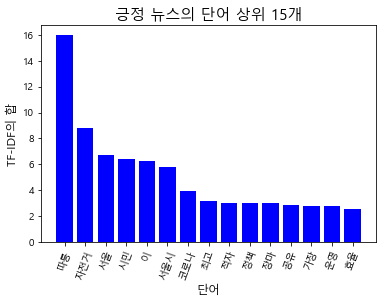

In [197]:
plt.bar(range(max), [i[1] for i in POS_words[:max]], color="blue")
plt.title("긍정 뉴스의 단어 상위 %d개" %max, fontsize=15)
plt.xlabel("단어", fontsize=12)
plt.ylabel("TF-IDF의 합", fontsize=12)
plt.xticks(range(max), [i[0] for i in POS_words[:max]], rotation=70)

plt.show()

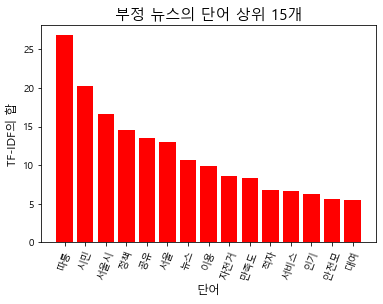

In [198]:
plt.bar(range(max), [i[1] for i in NEG_words[:max]], color="red")
plt.title("부정 뉴스의 단어 상위 %d개" %max, fontsize=15)
plt.xlabel("단어", fontsize=12)
plt.ylabel("TF-IDF의 합", fontsize=12)
plt.xticks(range(max), [i[0] for i in NEG_words[:max]], rotation=70)

plt.show()

In [1]:
import os
import sys
import urllib.request
import datetime
import time
import json
import pandas as pd

#[CODE 4] 자전거 이용 내역 csv파일 불러오기
def gettbCycleRentReportItem(yy):
    yy = "{0:0>2}".format(str(yy))
    totaltime = 0
    totalrent = 0
    totalmeter = 0
    for month in range(1,13):
        mm = "{0:0>2}".format(str(month))
        data = pd.read_csv('./따릉이 데이터/서울특별시 공공자전거 이용정보(월별)_'+yy+'.'+mm+'.csv', encoding='cp949')
        print(yy+mm)
        for item in data.이용시간:
            totaltime = totaltime + int(item)
            
        for item in data.이용건수:
            totalrent = totalrent + int(item)
            
        for item in data.이동거리:
            totalmeter = totalmeter + int(item)
            
    return (totaltime, totalmeter, totalrent)
            
    

#[CODE 5] 2017~2021 자전거 이용 내역 데이터
def gettbCycleRentReportService():
    rent = 0
    time = 0
    meter = 0
    
    rentresult = []
    timeresult = []
    meterresult = []

    for year in range(17,22):
        rentcount = 0
        timecount = 0
        metercount = 0
        
        timecount, metercount, rentcount = gettbCycleRentReportItem(year)
        
        rent = rent + rentcount
        meter = meter + metercount
        time = time + timecount
        
        rentresult.append([year, rentcount])
        timeresult.append([year, timecount])
        meterresult.append([year, metercount])
        
    return (rent, time, meter, rentresult, timeresult, meterresult)

#[CODE 4]
def main():
    rent = 0
    time = 0
    meter = 0
    
    rentresult = []
    timeresult = []
    meterresult = []

    rent, time, meter, rentresult, timeresult, meterresult = gettbCycleRentReportService()

    print("2017 ~ 2021 까지의 총 이용 건 수 : "+str(rent))
    print("2017 ~ 2021 까지의 총 이용 시간 : "+str(time))
    print("2017 ~ 2021 까지의 총 이용 거리 : "+str(meter))

    #이용 내역 csv 저장
    columns = ["년도", "이용 건 수"]
    result_df = pd.DataFrame(rentresult, columns = columns)
    result_df.to_csv('./따릉이 데이터/년도별 따릉이 이용 건 수.csv', index=False, encoding='cp949')
    
    columns = ["년도", "이용 시간"]
    result_df = pd.DataFrame(timeresult, columns = columns)
    result_df.to_csv('./따릉이 데이터/년도별 따릉이 이용 시간.csv', index=False, encoding='cp949')
    
    columns = ["년도", "이용 거리"]
    result_df = pd.DataFrame(meterresult, columns = columns)
    result_df.to_csv('./따릉이 데이터/년도별 따릉이 이용 거리.csv', index=False, encoding='cp949')
    
if __name__ == '__main__':
    main()


1701
1702
1703
1704
1705
1706
1707
1708
1709
1710
1711
1712
1801
1802
1803
1804
1805
1806
1807
1808
1809
1810
1811
1812
1901
1902
1903
1904
1905
1906


C:\Users\82105\AppData\Local\Temp\ipykernel_1084\3863142007.py:17: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('./따릉이 데이터/서울특별시 공공자전거 이용정보(월별)_'+yy+'.'+mm+'.csv', encoding='cp949')


1907
1908
1909
1910
1911
1912
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2101
2102
2103
2104
2105
2106
2107
2108
2109
2110
2111
2112
2017 ~ 2021 까지의 총 이용 건 수 : 89842092
2017 ~ 2021 까지의 총 이용 시간 : 2454514888
2017 ~ 2021 까지의 총 이용 거리 : 316425451333


In [159]:
for year in range(17,22):
    yy = "{0:0>2}".format(str(year))
    for month in range(1,13):
            total = 0
            mm = "{0:0>2}".format(str(month))
            data = pd.read_csv('./따릉이 데이터/서울특별시 공공자전거 이용정보(월별)_'+yy+'.'+mm+'.csv', encoding='cp949')
            data.rename(columns = {'이용거리(M)' : '이동거리'}, inplace = True)
            data.to_csv('./따릉이 데이터/서울특별시 공공자전거 이용정보(월별)_'+yy+'.'+mm+'.csv', encoding='cp949')
        

In [160]:
for year in range(17,22):
    yy = "{0:0>2}".format(str(year))
    print(yy)
    for month in range(1,13):
            total = 0
            mm = "{0:0>2}".format(str(month))
            data = pd.read_csv('./따릉이 데이터/서울특별시 공공자전거 이용정보(월별)_'+yy+'.'+mm+'.csv', encoding='cp949')
            print(data.columns)
        

17
Index(['Unnamed: 0.6', 'Unnamed: 0.5', 'Unnamed: 0.4', 'Unnamed: 0.3',
       'Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', '대여일자', '대여소번호', '대여소',
       '대여구분코드', '성별', '연령대코드', '이용건수', '운동량', '탄소량', '이동거리', '이용시간'],
      dtype='object')
Index(['Unnamed: 0.6', 'Unnamed: 0.5', 'Unnamed: 0.4', 'Unnamed: 0.3',
       'Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', '대여일자', '대여소번호', '대여소',
       '대여구분코드', '성별', '연령대코드', '이용건수', '운동량', '탄소량', '이동거리', '이용시간'],
      dtype='object')
Index(['Unnamed: 0.7', 'Unnamed: 0.6', 'Unnamed: 0.5', 'Unnamed: 0.4',
       'Unnamed: 0.3', 'Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', '대여일자',
       '대여소번호', '대여소', '대여구분코드', '성별', '연령대코드', '이용건수', '운동량', '탄소량', '이동거리',
       '이용시간'],
      dtype='object')
Index(['Unnamed: 0.6', 'Unnamed: 0.5', 'Unnamed: 0.4', 'Unnamed: 0.3',
       'Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', '대여일자', '대여소번호', '대여소',
       '대여구분코드', '성별', '연령대코드', '이용건수', '운동량', '탄소량', '이동거리', '이용시간'],
      dtype='object')
Index(['Un

C:\Users\82105\AppData\Local\Temp\ipykernel_31612\1772318658.py:7: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('./13장_data/서울특별시 공공자전거 이용정보(월별)_'+yy+'.'+mm+'.csv', encoding='cp949')


Index(['Unnamed: 0.5', 'Unnamed: 0.4', 'Unnamed: 0.3', 'Unnamed: 0.2',
       'Unnamed: 0.1', 'Unnamed: 0', '대여일자', '대여소번호', '대여소', '대여구분코드', '성별',
       '연령대코드', '이용건수', '운동량', '탄소량', '이동거리', '이용시간'],
      dtype='object')
Index(['Unnamed: 0.5', 'Unnamed: 0.4', 'Unnamed: 0.3', 'Unnamed: 0.2',
       'Unnamed: 0.1', 'Unnamed: 0', '대여일자', '대여소번호', '대여소', '대여구분코드', '성별',
       '연령대코드', '이용건수', '운동량', '탄소량', '이동거리', '이용시간'],
      dtype='object')
Index(['Unnamed: 0.5', 'Unnamed: 0.4', 'Unnamed: 0.3', 'Unnamed: 0.2',
       'Unnamed: 0.1', 'Unnamed: 0', '대여일자', '대여소번호', '대여소', '대여구분코드', '성별',
       '연령대코드', '이용건수', '운동량', '탄소량', '이동거리', '이용시간'],
      dtype='object')
Index(['Unnamed: 0.5', 'Unnamed: 0.4', 'Unnamed: 0.3', 'Unnamed: 0.2',
       'Unnamed: 0.1', 'Unnamed: 0', '대여일자', '대여소번호', '대여소', '대여구분코드', '성별',
       '연령대코드', '이용건수', '운동량', '탄소량', '이동거리', '이용시간'],
      dtype='object')
Index(['Unnamed: 0.5', 'Unnamed: 0.4', 'Unnamed: 0.3', 'Unnamed: 0.2',
       'Unnamed: 0.1', 'Unnam

In [99]:
data.to_csv('./따릉이 데이터/서울특별시 공공자전거 이용정보(월별)_17.03.csv', encoding='cp949')

In [ ]:
data.rename(columns = {'\'대여일자\'' : '대여일자', '\'대여소번호\'' : '대여소번호', '\'대여소\'' : '대여소', '\'대여구분코드\'' : '대여구분코드', '\'성별\'' : '성별', 
                      '\'연령대코드\'' : '연령대코드', '\'이용건수\'' : '이용건수', '\'운동량\'' : '운동량', '\'탄소량\'' : '탄소량', '\'이동거리(M)\'' : '이동거리', '\'이용시간(분)\'' : '이용시간'}, inplace = True)
data.to_csv('./따릉이 데이터/서울특별시 공공자전거 이용정보(월별)_17.03.csv', encoding='cp949')

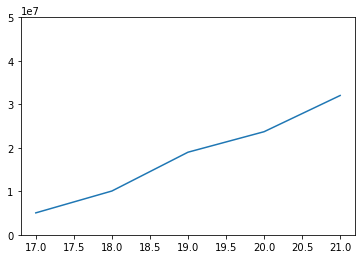

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

result_df = pd.read_csv('./따릉이 데이터/년도별 따릉이 이용 건 수.csv', encoding='cp949')

x = result_df['년도']
y = result_df['이용 건 수']

plt.plot(x,y)
plt.ylim([0,50000000])
plt.show()

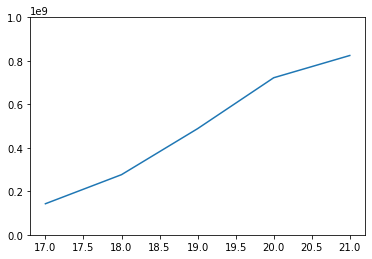

In [7]:
result_df = pd.read_csv('./따릉이 데이터/년도별 따릉이 이용 시간.csv', encoding='cp949')

x = result_df['년도']
y = result_df['이용 시간']

plt.plot(x,y)
plt.ylim([0,1000000000])
plt.show()

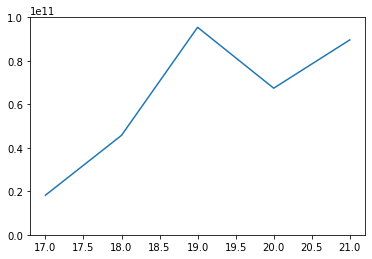

In [8]:
result_df = pd.read_csv('./따릉이 데이터/년도별 따릉이 이용 거리.csv', encoding='cp949')

x = result_df['년도']
y = result_df['이용 거리']

plt.plot(x,y)
plt.ylim([0,100000000000])
plt.show()